## Homework 1 


*背包问题* //
有以下物品：按照编号重量价值分别为存储为c_j,w_j.
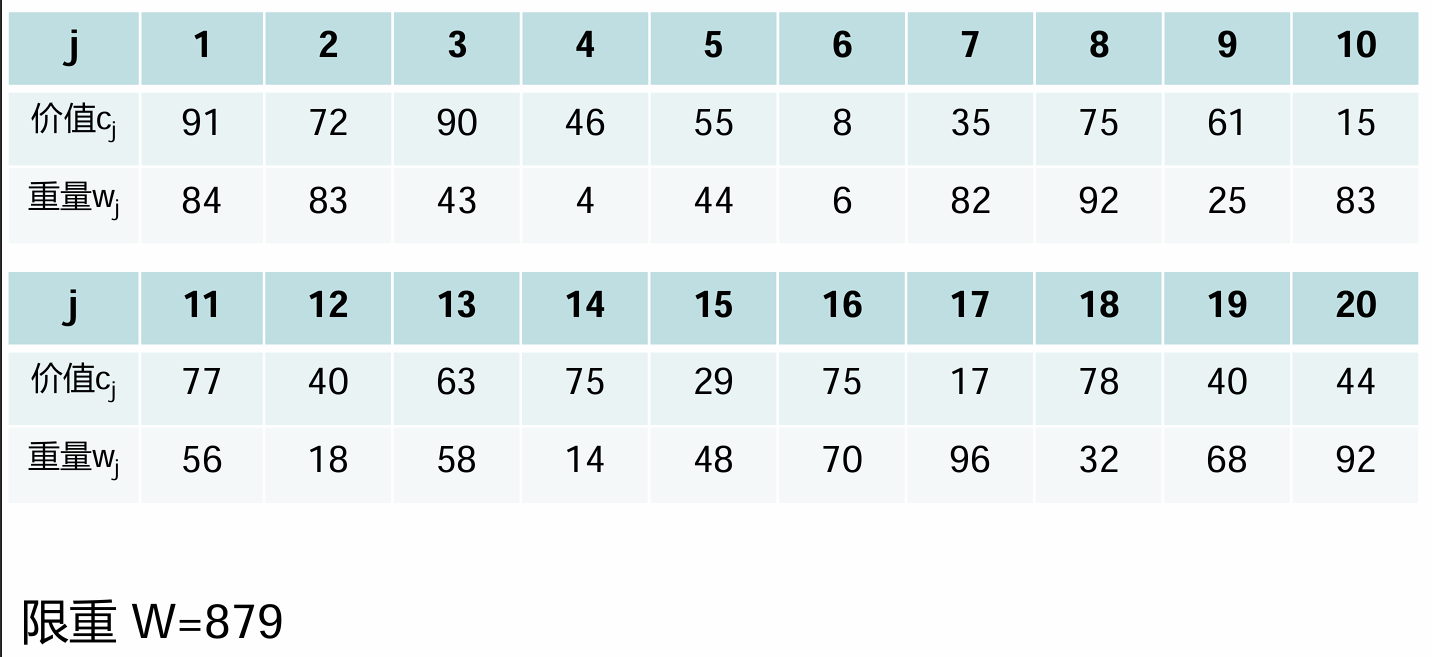

In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:
# Import data of the question
data = {
    'j': list(range(1, 21)),
    'c': [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44],
    'w': [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
}
overWeight = 879

In [13]:
# Parameters
max_generations = 500  # Number of generations
population_size = 100  # Size of the population
mutation_rate = 0.01  # Mutation rate

# Data from the DataFrame
values = data['c']
weights = data['w']
num_items = len(values)

# Fitness function
def fitness(individual):
    total_value = np.dot(individual, values)
    total_weight = np.dot(individual, weights)
    
    if total_weight > overWeight:
        return 0  # Invalid solution
    return total_value

# Generate initial population
def generate_population(population_size, num_items):
    return [np.random.randint(2, size=num_items) for _ in range(population_size)]

# Tournament selection
def selection(population):
    tournament_size = 5
    selected = random.sample(population, tournament_size)
    return max(selected, key=fitness)

# Crossover operation (single-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child = np.concatenate((parent1[:point], parent2[point:]))
    return child

# Mutation operation
def mutate(individual):
    for i in range(num_items):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

# Main genetic algorithm
def genetic_algorithm():
    population = generate_population(population_size, num_items)
    
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population

        # Get the best solution in the current population
        best_individual = max(population, key=fitness)
        best_fitness = fitness(best_individual)
        
        if generation % 50 == 0:
            print(f"Generation {generation}, Best Fitness: {best_fitness}")
    
    return best_individual, fitness(best_individual)

# Run the algorithm
best_solution, best_value = genetic_algorithm()
best_solution, best_value


Generation 0, Best Fitness: 938
Generation 50, Best Fitness: 1025
Generation 100, Best Fitness: 1025
Generation 150, Best Fitness: 1025
Generation 200, Best Fitness: 1025
Generation 250, Best Fitness: 1025
Generation 300, Best Fitness: 1025
Generation 350, Best Fitness: 1025
Generation 400, Best Fitness: 1025
Generation 450, Best Fitness: 1025


(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       dtype=int32),
 np.int64(1025))

In [14]:
# Improved Genetic Algorithm with adaptive stopping
def genetic_algorithm_adaptive(max_generations=500, patience=50):
    population = generate_population(population_size, num_items)
    best_fitness_over_time = []
    
    best_solution = None
    best_fitness = 0
    generations_without_improvement = 0
    
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population

        # Get the best solution in the current population
        current_best_individual = max(population, key=fitness)
        current_best_fitness = fitness(current_best_individual)
        
        # Track the best solution and fitness
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best_individual
            generations_without_improvement = 0
        else:
            generations_without_improvement += 1
        
        best_fitness_over_time.append(best_fitness)
        
        # Print progress every 50 generations
        if generation % 50 == 0:
            print(f"Generation {generation}, Best Fitness: {best_fitness}")

        # Stop early if no improvement for 'patience' generations
        if generations_without_improvement >= patience:
            print(f"No improvement for {patience} generations, stopping early at generation {generation}")
            break
    
    return best_solution, best_fitness

# Run the adaptive genetic algorithm
best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive()
best_solution_adaptive, best_value_adaptive


Generation 0, Best Fitness: 924
Generation 50, Best Fitness: 1019
No improvement for 50 generations, stopping early at generation 56


(array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       dtype=int32),
 np.int64(1019))